# Project Title
Economic/Financial impact and adaptations from COVID-19 Pandemic.

## Topic
*What problem are you (or your stakeholder) trying to address?*
Using data analysis, machine learning, and data manipulation to investigate the econnomic consequences contributed by COVID-19 by searching the current case, deaths, and testing levels by country, and both financial and economic status of each country.
## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
What are the major economic and financial consequences from COVID-19 Pandemic? How people can adapt to the pandemic financially?
## What would an answer look like?
*What is your hypothesized answer to your question?*
![](COVID_Data.png)
![](COVID_Vaccine_Data.png)
 
COVID-19 Pandemic contributes to the decline in performance of the global economy. As people continue to get infected, health and financial situations start to unravel. Major businesses start to either shut down or scale back on their operations. That in turn contributes to the economic decline because people had to take care of their sick family members. People can adapt to the situation by requiring masks, testing, and vaccinations so that they can slowly go back to normal operations over time. Graphs and visualization will be applied to show the changes in the economy during COVID-19 Pandemic.
## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
*How will you use this data to answer your project question?*

Data Sources:
- https://vaccovid-coronavirus-vaccine-and-treatment-tracker.p.rapidapi.com/api/npm-covid-data/ (Note: This needs an API key. Go to https://rapidapi.com/vaccovidlive-vaccovidlive-default/api/vaccovid-coronavirus-vaccine-and-treatment-tracker/)
- EO_14102022180121049.csv (URL: https://stats.oecd.org/Index.aspx?DatasetCode=STLABOUR#)
- EO_14102022183231815.csv (URL: https://stats.oecd.org/Index.aspx?DatasetCode=STLABOUR#)
- https://covid19.who.int/who-data/vaccination-data.csv

The 2 datasets will show the current COVID cases that includes their severity, deaths, testing, and vaccination levels by country. GDP growth and Unemployment data of each country will help explain the economic and financial consequences of COVID-19. The more people adapt to the COVID-19 Pandemic, the easier it is to get used to it and keep on moving. 

In [1]:
# Start your code here

import requests
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
## For preprocessing
from sklearn.preprocessing import (
  OneHotEncoder,
  OrdinalEncoder,
  StandardScaler
)
from sklearn.impute import (
  SimpleImputer
)
## For model selection
from sklearn.model_selection import (
  StratifiedShuffleSplit,
  train_test_split,
  cross_val_score,
  KFold,
  GridSearchCV
)

# Classifier Algorithms
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (
  RandomForestClassifier, 
  GradientBoostingClassifier,
  BaggingClassifier
)

# API

url = "https://vaccovid-coronavirus-vaccine-and-treatment-tracker.p.rapidapi.com/api/npm-covid-data/"

headers = {
	"X-RapidAPI-Key": "fbf638b489msh484afad00eb0877p19941bjsnfcab5b02a55a",
	"X-RapidAPI-Host": "vaccovid-coronavirus-vaccine-and-treatment-tracker.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers)

In [2]:
# Database file
gdp_growth_df = pd.read_csv('EO_14102022183231815.csv')
pd.set_option('display.max_columns', None)

In [3]:
unemployment_df = pd.read_csv('EO_14102022180121049.csv')

In [4]:
# Database or File URL
vaccination_df = pd.read_csv('https://covid19.who.int/who-data/vaccination-data.csv')

In [5]:
json = response.json()
covid_df = pd.DataFrame(json)

In [6]:
display(covid_df.describe())
display(covid_df.corr())
display(covid_df.info())
display(covid_df.isnull().sum())

,rank,Infection_Risk,Case_Fatality_Rate,Test_Percentage,Recovery_Proporation,TotalCases,NewCases,TotalDeaths,NewDeaths,NewRecovered,ActiveCases,one_Caseevery_X_ppl,one_Deathevery_X_ppl,one_Testevery_X_ppl,Deaths_1M_pop,Serious_Critical,Tests_1M_Pop,TotCases_1M_Pop
count,222.000000,222.000000,222.000000,222.000000,222.000000,2.220000e+02,222.000000,2.220000e+02,222.000000,222.000000,2.220000e+02,222.000000,222.000000,222.000000,222.000000,222.000000,2.220000e+02,222.000000
mean,111.036036,18.004910,1.469189,194.586532,86.773649,8.605751e+06,909.500000,8.929802e+04,1.027027,2124.382883,1.770809e+05,431.297297,13313.211712,10.968468,1217.408108,482.382883,1.945864e+06,180788.470721
std,65.438435,18.874371,2.191072,349.337308,27.633269,6.087523e+07,7607.955135,6.315308e+05,8.253845,16428.947434,1.295004e+06,4222.234433,53161.633601,27.742251,1255.084481,3444.068220,3.493374e+06,188195.203572
min,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,55.250000,1.230000,0.502500,9.662500,93.647500,3.399350e+04,0.000000,2.332500e+02,0.000000,0.000000,7.000000e+01,3.000000,481.000000,0.000000,165.750000,0.000000,9.664300e+04,15543.750000
50%,110.500000,11.480000,0.970000,71.290000,97.690000,2.357595e+05,0.000000,2.626000e+03,0.000000,0.000000,8.495000e+02,8.000000,1099.000000,1.000000,804.500000,4.000000,7.129260e+05,114823.500000
75%,165.750000,29.610000,1.860000,209.587500,98.865000,1.386515e+06,0.000000,1.608850e+04,0.000000,0.000000,1.519025e+04,59.000000,5557.500000,5.000000,1974.000000,30.750000,2.095878e+06,296123.750000
max,230.000000,70.400000,22.220000,2213.820000,100.000000,6.384366e+08,67303.000000,6.608108e+06,76.000000,157139.000000,1.353570e+07,62616.000000,626161.000000,196.000000,6445.000000,35698.000000,2.213821e+07,703959.000000


C:\Users\Kevin Zhu\AppData\Local\Temp\ipykernel_36520\340159003.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(covid_df.corr())


,rank,Infection_Risk,Case_Fatality_Rate,Test_Percentage,Recovery_Proporation,TotalCases,NewCases,TotalDeaths,NewDeaths,NewRecovered,ActiveCases,one_Caseevery_X_ppl,one_Deathevery_X_ppl,one_Testevery_X_ppl,Deaths_1M_pop,Serious_Critical,Tests_1M_Pop,TotCases_1M_Pop
rank,1.000000,-0.209494,0.157697,-0.108183,-0.237109,-0.228632,-0.197054,-0.226501,-0.206802,-0.215125,-0.219205,0.155726,0.267049,0.260336,-0.410829,-0.222347,-0.108184,-0.216770
Infection_Risk,-0.209494,1.000000,-0.348542,0.563093,-0.117974,-0.066884,-0.010637,-0.085853,-0.013879,-0.025699,-0.069090,-0.096638,-0.219384,-0.349800,0.477316,-0.095511,0.563093,0.999157
Case_Fatality_Rate,0.157697,-0.348542,1.000000,-0.219829,-0.002630,-0.027758,-0.039765,-0.013430,-0.041548,-0.037072,-0.030098,0.292669,0.203099,0.254379,-0.046871,-0.005056,-0.219829,-0.350341
Test_Percentage,-0.108183,0.563093,-0.219829,1.000000,-0.031172,-0.042857,-0.061846,-0.051783,-0.059158,-0.047356,-0.052815,-0.056166,-0.124242,-0.213273,0.232660,-0.063831,1.000000,0.562552
Recovery_Proporation,-0.237109,-0.117974,-0.002630,-0.031172,1.000000,0.051310,0.044280,0.050267,0.046726,0.047651,0.041877,0.001070,0.006540,0.005520,0.050152,0.047986,-0.031172,-0.116901
TotalCases,-0.228632,-0.066884,-0.027758,-0.042857,0.051310,1.000000,0.838848,0.997101,0.871572,0.910553,0.990580,-0.014367,-0.034491,-0.053736,0.003809,0.981742,-0.042857,-0.026333
NewCases,-0.197054,-0.010637,-0.039765,-0.061846,0.044280,0.838848,1.000000,0.822510,0.991704,0.810815,0.840828,-0.011216,-0.024615,-0.043191,-0.044414,0.816642,-0.061846,0.023697
TotalDeaths,-0.226501,-0.085853,-0.013430,-0.051783,0.050267,0.997101,0.822510,1.000000,0.856004,0.895694,0.983958,-0.014277,-0.034503,-0.052189,0.018584,0.988418,-0.051783,-0.045452
NewDeaths,-0.206802,-0.013879,-0.041548,-0.059158,0.046726,0.871572,0.991704,0.856004,1.000000,0.833607,0.871948,-0.012727,-0.029893,-0.045763,-0.045867,0.849473,-0.059158,0.021849
NewRecovered,-0.215125,-0.025699,-0.037072,-0.047356,0.047651,0.910553,0.810815,0.895694,0.833607,1.000000,0.914062,-0.013146,-0.031535,-0.049434,-0.007366,0.891392,-0.047357,0.011380


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    222 non-null    object 
 1   rank                  222 non-null    int64  
 2   Country               222 non-null    object 
 3   Continent             222 non-null    object 
 4   TwoLetterSymbol       220 non-null    object 
 5   ThreeLetterSymbol     220 non-null    object 
 6   Infection_Risk        222 non-null    float64
 7   Case_Fatality_Rate    222 non-null    float64
 8   Test_Percentage       222 non-null    float64
 9   Recovery_Proporation  222 non-null    float64
 10  TotalCases            222 non-null    int64  
 11  NewCases              222 non-null    int64  
 12  TotalDeaths           222 non-null    int64  
 13  NewDeaths             222 non-null    int64  
 14  TotalRecovered        222 non-null    object 
 15  NewRecovered          2

None

id                      0
rank                    0
Country                 0
Continent               0
TwoLetterSymbol         2
ThreeLetterSymbol       2
Infection_Risk          0
Case_Fatality_Rate      0
Test_Percentage         0
Recovery_Proporation    0
TotalCases              0
NewCases                0
TotalDeaths             0
NewDeaths               0
TotalRecovered          0
NewRecovered            0
ActiveCases             0
TotalTests              0
Population              0
one_Caseevery_X_ppl     0
one_Deathevery_X_ppl    0
one_Testevery_X_ppl     0
Deaths_1M_pop           0
Serious_Critical        0
Tests_1M_Pop            0
TotCases_1M_Pop         0
dtype: int64

Showing descriptive statistics, correlation, and information about the dataset that holds the current cases, deaths, and testing data on COVID-19 in each country. It also includes the first 2 rows that both show total amount of cases, deaths, and testing globally. Only TwoLetterSymbol and TwoLetterSymbol have missing data that is also found on those same rows after analyzing it. Those are not needed so it should be removed. Besides that, no duplicated date found in this dataset. I noticed that some test percentage values are above 100%. From what I could tell, people tend to get tested more than once for specific reasons that include going to events or travel to places.

In [7]:
covid_df.dropna(inplace=True)
display(covid_df.isnull().sum())

id                      0
rank                    0
Country                 0
Continent               0
TwoLetterSymbol         0
ThreeLetterSymbol       0
Infection_Risk          0
Case_Fatality_Rate      0
Test_Percentage         0
Recovery_Proporation    0
TotalCases              0
NewCases                0
TotalDeaths             0
NewDeaths               0
TotalRecovered          0
NewRecovered            0
ActiveCases             0
TotalTests              0
Population              0
one_Caseevery_X_ppl     0
one_Deathevery_X_ppl    0
one_Testevery_X_ppl     0
Deaths_1M_pop           0
Serious_Critical        0
Tests_1M_Pop            0
TotCases_1M_Pop         0
dtype: int64

Removed rows that have missing data.

In [8]:
display(px.bar(covid_df.sample(20), x='Country', y='Infection_Risk', labels={'Infection_Risk':'Infection Risk (%)'}, title='Infection Risk by Country'))

Presenting a bar chart using plotly.express to show infection risk levels from 20 random countries. These risk levels will show the chances of getting infected at these countries. Some governments take extreme measures like enforcing mandatory quarantine to contain the virus while others are struggling with their main industry like tourism. That in turn can cause decline in economic performance.

In [9]:
display(gdp_growth_df.describe())
display(gdp_growth_df.corr())
display(gdp_growth_df.info())

,PowerCode Code,Value,Flag Codes,Flags
count,600.0,600.000000,0.0,0.0
mean,0.0,3.540973,NaN,NaN
std,0.0,5.037589,NaN,NaN
min,0.0,-18.178624,NaN,NaN
25%,0.0,1.358089,NaN,NaN
50%,0.0,2.870283,NaN,NaN
75%,0.0,5.106996,NaN,NaN
max,0.0,36.365622,NaN,NaN


C:\Users\Kevin Zhu\AppData\Local\Temp\ipykernel_36520\2607317412.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,PowerCode Code,Value,Flag Codes,Flags
PowerCode Code,NaN,NaN,NaN,NaN
Value,NaN,1.0,NaN,NaN
Flag Codes,NaN,NaN,NaN,NaN
Flags,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               600 non-null    object 
 1   Country                600 non-null    object 
 2   VARIABLE               600 non-null    object 
 3   Variable               600 non-null    object 
 4   FREQUENCY              600 non-null    object 
 5   Frequency              600 non-null    object 
 6   TIME                   600 non-null    object 
 7   Time                   600 non-null    object 
 8   Unit Code              600 non-null    object 
 9   Unit                   600 non-null    object 
 10  PowerCode Code         600 non-null    int64  
 11  PowerCode              600 non-null    object 
 12  Reference Period Code  600 non-null    object 
 13  Reference Period       600 non-null    object 
 14  Value                  600 non-null    float64
 15  Flag C

None

Showing descriptive statistics, correlation, and information about the dataset that holds quarterly gdp growth from each country, starting from first quarter of 2019 to the projected GDP growth in 2023. No correlations are found in this dataset due to seeing missing data on all integer columns except the value column itself. I can change either "Time" or "TIME" column to date/time data type if I'm going to use them for a graph or other visualization. "Flag Codes" and "Flags" columns are empty so they will be removed.

In [10]:
if('Flag Codes', 'Flags') in gdp_growth_df.columns:
    gdp_growth_df.drop(columns=['Flag Codes', 'Flags'], inplace=True)
gdp_growth_df['TIME'] = pd.to_datetime(gdp_growth_df['TIME'])

Removing empty "Flag Codes" and "Flags" columns and changed "TIME" column to datetime data type. The "TIME" column will be used to show the time progression of GDP growth in each country and understand its impact from COVID-19 pandemic.

In [11]:
display(px.line(gdp_growth_df, x='TIME', y='Value', color='Country', labels={'Value':'GDP Growth (%)'}, title='GDP Growth Progression'))

This is a line graph from plotly express. This shows GDP growth of each country over time. As you can see, some countries didn't adapt as quickly as others at the height of the pandemic in 2020 which explains the moderate to sharp drop in GDP growth. 

In [12]:
display(unemployment_df.describe())
display(unemployment_df.median())
display(unemployment_df.corr())
display(unemployment_df.info())

,PowerCode Code,Reference Period Code,Reference Period,Value,Flag Codes,Flags
count,660.0,0.0,0.0,660.000000,0.0,0.0
mean,0.0,NaN,NaN,6.549563,NaN,NaN
std,0.0,NaN,NaN,5.320697,NaN,NaN
min,0.0,NaN,NaN,1.935733,NaN,NaN
25%,0.0,NaN,NaN,3.807204,NaN,NaN
50%,0.0,NaN,NaN,5.074848,NaN,NaN
75%,0.0,NaN,NaN,7.190324,NaN,NaN
max,0.0,NaN,NaN,34.874431,NaN,NaN


C:\Users\Kevin Zhu\AppData\Local\Temp\ipykernel_36520\1232838216.py:2: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



PowerCode Code           0.000000
Reference Period Code         NaN
Reference Period              NaN
Value                    5.074848
Flag Codes                    NaN
Flags                         NaN
dtype: float64

C:\Users\Kevin Zhu\AppData\Local\Temp\ipykernel_36520\1232838216.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,PowerCode Code,Reference Period Code,Reference Period,Value,Flag Codes,Flags
PowerCode Code,NaN,NaN,NaN,NaN,NaN,NaN
Reference Period Code,NaN,NaN,NaN,NaN,NaN,NaN
Reference Period,NaN,NaN,NaN,NaN,NaN,NaN
Value,NaN,NaN,NaN,1.0,NaN,NaN
Flag Codes,NaN,NaN,NaN,NaN,NaN,NaN
Flags,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               660 non-null    object 
 1   Country                660 non-null    object 
 2   VARIABLE               660 non-null    object 
 3   Variable               660 non-null    object 
 4   FREQUENCY              660 non-null    object 
 5   Frequency              660 non-null    object 
 6   TIME                   660 non-null    object 
 7   Time                   660 non-null    object 
 8   Unit Code              660 non-null    object 
 9   Unit                   660 non-null    object 
 10  PowerCode Code         660 non-null    int64  
 11  PowerCode              660 non-null    object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  660 non-null    float64
 15  Flag C

None

Showing descriptive statistics, correlation, information, and boxplot on the dataset that holds quarterly unemployment rate from each country, starting from first quarter of 2019 to the projected GDP growth in 2023. No correlations are found in this dataset due to seeing missing data on all integer columns except the value column itself. I can change either "Time" or "TIME" column to date/time data type if I'm going to use them for a graph or other visualization. "Flag Codes", "Flags", "Reference Period Code",and "Reference Period" columns are empty so they will be removed.

[Text(0, 0, '2019-Q1'),
 Text(1, 0, '2019-Q2'),
 Text(2, 0, '2019-Q3'),
 Text(3, 0, '2019-Q4'),
 Text(4, 0, '2020-Q1'),
 Text(5, 0, '2020-Q2'),
 Text(6, 0, '2020-Q3'),
 Text(7, 0, '2020-Q4'),
 Text(8, 0, '2021-Q1'),
 Text(9, 0, '2021-Q2'),
 Text(10, 0, '2021-Q3'),
 Text(11, 0, '2021-Q4'),
 Text(12, 0, '2022-Q1'),
 Text(13, 0, '2022-Q2'),
 Text(14, 0, '2022-Q3'),
 Text(15, 0, '2022-Q4'),
 Text(16, 0, '2023-Q1'),
 Text(17, 0, '2023-Q2'),
 Text(18, 0, '2023-Q3'),
 Text(19, 0, '2023-Q4')]

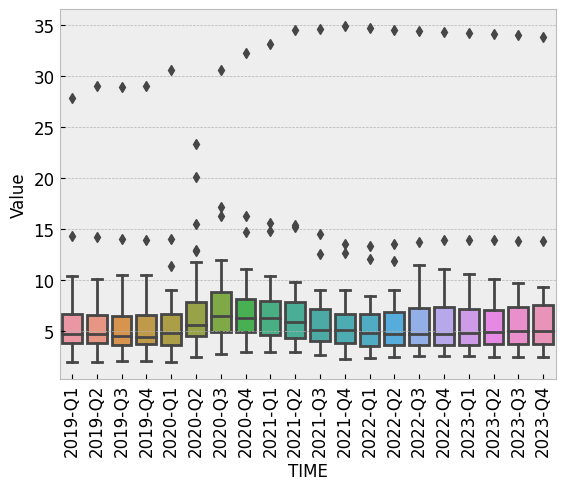

In [13]:
unemployment_box = sns.boxplot(data=unemployment_df, x='TIME', y='Value')
unemployment_box.set_xticklabels(labels=unemployment_box.get_xticklabels(), rotation=90)

Used boxplot from seaborn visualization library. Rotated TIME labels by 90 degrees prevent them from being overlapped by each other. From the boxplot above, there are some outliers in the unemployment rate on each of the "TIME" columns.

In [14]:
if('Flag Codes', 'Flags', 'Reference Period Code', 'Reference Period') in unemployment_df.columns:
    unemployment_df.drop(columns=['Flag Codes', 'Flags', 'Reference Period Code', 'Reference Period'],inplace = True)
unemployment_df['TIME'] = pd.to_datetime(unemployment_df['TIME'])

Removed "Flag Codes", "Flags", "Reference Period Code", "Reference Period" columns because they are not relevant to this project. Changing "TIME" column to datetime data type.

In [15]:
display(px.line(unemployment_df, x='TIME', y='Value', color='Country', labels={'Value':'Unemployment Rate (%)'}, title='Unemployment by Country'))

Here's the line graph from plotly express. This shows the unemployment rates at each country over time during the COVID-19 pandemic. It gives the insight on how well each country has adapted during the COVID-19 Pandemic.

In [16]:
display(vaccination_df.describe())
display(vaccination_df.median())
display(vaccination_df.corr())
display(vaccination_df.info())

,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
count,2.280000e+02,2.280000e+02,227.000000,228.000000,2.280000e+02,228.000000,225.000000,2.040000e+02,204.000000
mean,5.720225e+07,2.398180e+07,150.077145,62.424728,2.199715e+07,57.141039,4.844444,1.142577e+07,31.238245
std,2.799407e+08,1.134793e+08,88.915526,27.596744,1.080366e+08,27.321472,2.834384,6.001000e+07,25.782210
min,1.380000e+02,0.000000e+00,0.236000,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,0.000000
25%,4.641722e+05,1.914585e+05,76.922500,43.060250,1.855318e+05,36.670000,3.000000,4.241700e+04,7.448000
50%,3.979227e+06,2.313092e+06,152.780000,66.184000,2.147929e+06,61.871500,4.000000,5.040755e+05,28.754000
75%,2.102640e+07,1.013656e+07,212.325500,81.543250,8.485522e+06,76.217000,7.000000,3.835280e+06,51.921500
max,3.464049e+09,1.307508e+09,654.484000,189.144000,1.277348e+09,185.088000,12.000000,8.034255e+08,164.216000


C:\Users\Kevin Zhu\AppData\Local\Temp\ipykernel_36520\1804452266.py:2: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



TOTAL_VACCINATIONS                      3.979227e+06
PERSONS_VACCINATED_1PLUS_DOSE           2.313092e+06
TOTAL_VACCINATIONS_PER100               1.527800e+02
PERSONS_VACCINATED_1PLUS_DOSE_PER100    6.618400e+01
PERSONS_FULLY_VACCINATED                2.147929e+06
PERSONS_FULLY_VACCINATED_PER100         6.187150e+01
NUMBER_VACCINES_TYPES_USED              4.000000e+00
PERSONS_BOOSTER_ADD_DOSE                5.040755e+05
PERSONS_BOOSTER_ADD_DOSE_PER100         2.875400e+01
dtype: float64

C:\Users\Kevin Zhu\AppData\Local\Temp\ipykernel_36520\1804452266.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
TOTAL_VACCINATIONS,1.000000,0.994143,0.117925,0.130334,0.996588,0.129736,0.151660,0.956316,0.079344
PERSONS_VACCINATED_1PLUS_DOSE,0.994143,1.000000,0.098504,0.117726,0.999246,0.114542,0.154675,0.920588,0.053731
TOTAL_VACCINATIONS_PER100,0.117925,0.098504,1.000000,0.951914,0.101497,0.964102,0.030807,0.135620,0.934228
PERSONS_VACCINATED_1PLUS_DOSE_PER100,0.130334,0.117726,0.951914,1.000000,0.118179,0.983209,0.023085,0.137405,0.828656
PERSONS_FULLY_VACCINATED,0.996588,0.999246,0.101497,0.118179,1.000000,0.117192,0.151819,0.930961,0.059550
PERSONS_FULLY_VACCINATED_PER100,0.129736,0.114542,0.964102,0.983209,0.117192,1.000000,0.035061,0.140677,0.866392
NUMBER_VACCINES_TYPES_USED,0.151660,0.154675,0.030807,0.023085,0.151819,0.035061,1.000000,0.147819,0.026041
PERSONS_BOOSTER_ADD_DOSE,0.956316,0.920588,0.135620,0.137405,0.930961,0.140677,0.147819,1.000000,0.123023
PERSONS_BOOSTER_ADD_DOSE_PER100,0.079344,0.053731,0.934228,0.828656,0.059550,0.866392,0.026041,0.123023,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   COUNTRY                               229 non-null    object 
 1   ISO3                                  229 non-null    object 
 2   WHO_REGION                            229 non-null    object 
 3   DATA_SOURCE                           229 non-null    object 
 4   DATE_UPDATED                          229 non-null    object 
 5   TOTAL_VACCINATIONS                    228 non-null    float64
 6   PERSONS_VACCINATED_1PLUS_DOSE         228 non-null    float64
 7   TOTAL_VACCINATIONS_PER100             227 non-null    float64
 8   PERSONS_VACCINATED_1PLUS_DOSE_PER100  228 non-null    float64
 9   PERSONS_FULLY_VACCINATED              228 non-null    float64
 10  PERSONS_FULLY_VACCINATED_PER100       228 non-null    float64
 11  VACCINES_USED      

None

Almost all the columns from the dataset above have positive correlations with each other. I noticed that some columns have missing data including first vaccine date and amount of people who got the booster. The median and the 50th Percentile values on each column are the same in the vaccination dataset.

In [17]:
vaccination_df.dropna(inplace=True)
display(vaccination_df.isnull().sum())
for col in vaccination_df.select_dtypes(include='object').columns:
    display(vaccination_df[[col]].value_counts())
vaccination_df['WHO_REGION'] = vaccination_df['WHO_REGION'].replace(['OTHER'], 'EURO')

COUNTRY                                 0
ISO3                                    0
WHO_REGION                              0
DATA_SOURCE                             0
DATE_UPDATED                            0
TOTAL_VACCINATIONS                      0
PERSONS_VACCINATED_1PLUS_DOSE           0
TOTAL_VACCINATIONS_PER100               0
PERSONS_VACCINATED_1PLUS_DOSE_PER100    0
PERSONS_FULLY_VACCINATED                0
PERSONS_FULLY_VACCINATED_PER100         0
VACCINES_USED                           0
FIRST_VACCINE_DATE                      0
NUMBER_VACCINES_TYPES_USED              0
PERSONS_BOOSTER_ADD_DOSE                0
PERSONS_BOOSTER_ADD_DOSE_PER100         0
dtype: int64

COUNTRY                       
Albania                           1
Panama                            1
New Zealand                       1
Nigeria                           1
Niue                              1
                                 ..
Guadeloupe                        1
Guam                              1
Guatemala                         1
Guinea                            1
occupied Palestinian territory    1
Length: 191, dtype: int64

ISO3
AGO     1
PAK     1
NCL     1
NGA     1
NIU     1
       ..
GUF     1
GUM     1
GUY     1
HND     1
ZWE     1
Length: 191, dtype: int64

WHO_REGION
EURO          50
AMRO          42
AFRO          36
WPRO          35
EMRO          17
SEARO         10
OTHER          1
dtype: int64

DATA_SOURCE
REPORTING      191
dtype: int64

DATE_UPDATED
2022-11-25      44
2022-11-13      36
2022-11-20      18
2022-10-30      11
2022-11-21       6
2022-11-06       6
2022-11-28       4
2022-11-27       4
2022-10-16       3
2022-11-30       3
2022-09-04       3
2022-09-25       2
2022-10-23       2
2022-11-29       2
2022-10-09       2
2022-05-22       2
2022-11-10       2
2022-11-17       2
2022-08-23       2
2022-08-21       2
2022-11-16       1
2022-11-24       1
2022-10-31       1
2022-11-11       1
2022-11-23       1
2022-11-08       1
2022-11-04       1
2022-11-18       1
2022-11-03       1
2022-11-02       1
2022-11-01       1
2022-11-22       1
2022-02-27       1
2022-10-27       1
2022-10-25       1
2022-04-10       1
2022-05-10       1
2022-06-05       1
2022-06-18       1
2022-07-11       1
2022-07-24       1
2022-07-26       1
2022-07-31       1
2022-08-20       1
2022-08-28       1
2022-08-31       1
2022-09-11       1
2022-09-18       1
2022-09-26       1
2022-09-30       1
2022-10-02       1
2022-10-05       1

VACCINES_USED                                                                                                                                                                                                                                                            
AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,CanSino - Convidecia,Gamaleya - Gam-Covid-Vac,Gamaleya - Sputnik-Light,Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfizer BioNTech - Comirnaty,Sinovac - CoronaVac                                          10
AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S,Moderna - Spikevax,Novavax-NUVAXOVID,Pfizer BioNTech - Comirnaty                                                                                                                                                               8
AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfizer BioNTech - Comirnaty                                                                                                 

FIRST_VACCINE_DATE
2020-12-23            19
2020-12-30            10
2021-02-17             7
2021-03-10             6
2021-02-24             6
                      ..
2021-02-26             1
2021-02-27             1
2021-02-28             1
2021-03-03             1
2021-10-18             1
Length: 95, dtype: int64

Removing rows that have missing data from the vaccination dataset. Since Liechtenstein is has the value of 'OTHER' in the WHO_REGION column, it is treated as 'EURO' since it's part of Europe.

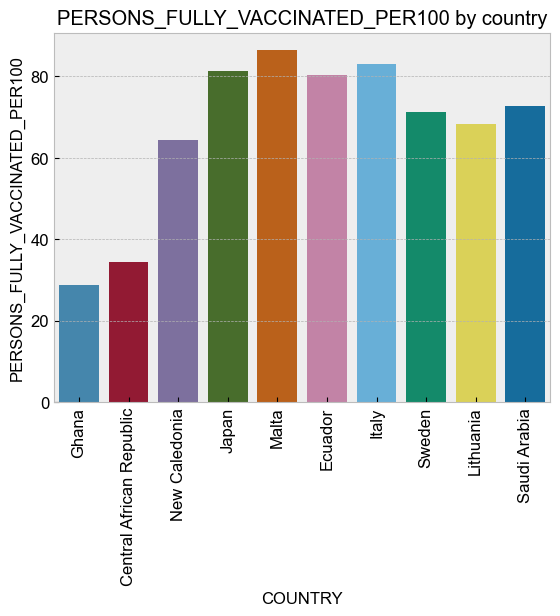

In [18]:
sns.barplot(data=vaccination_df.sample(10), x='COUNTRY', y='PERSONS_FULLY_VACCINATED_PER100').set(
    title="PERSONS_FULLY_VACCINATED_PER100 by country")
sns.set(rc={"figure.figsize": (10, 10)})
plt.xticks(rotation=90)
plt.show()


This is a bar graph from seaborn library. It shows the number of people fully vaccinated per 100 by each country based on most recent data. This gives an insight on how far each country has progressed to get their citizens full vaccinated. Businesses evolve over time to get their employees back to work while at the same time, minimize infections so that they can smoothly and efficiently recover their losses from the pandemic.

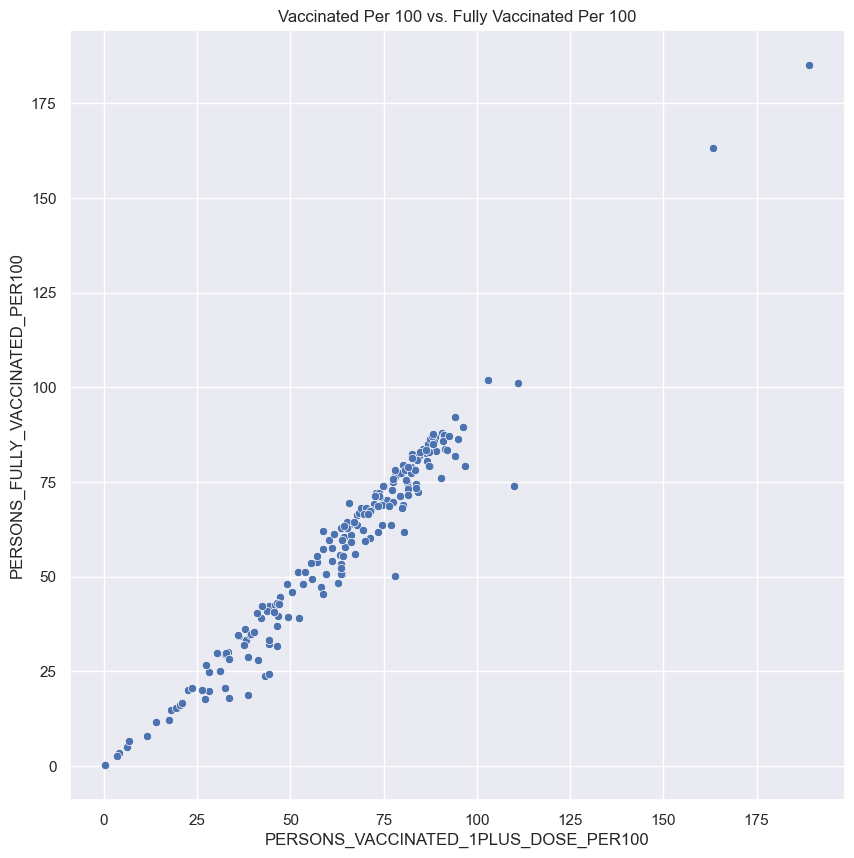

In [19]:
sns.scatterplot(data=vaccination_df, x='PERSONS_VACCINATED_1PLUS_DOSE_PER100',
                y='PERSONS_FULLY_VACCINATED_PER100').set(title="Vaccinated Per 100 vs. Fully Vaccinated Per 100")
sns.set(rc={"figure.figsize": (10, 10)})

Using scatterplot from seaborn library to plot between number of people per 100 population that are vaccinated with at least 1 dose and fully vaccinated. It represents similarly like a comparison between the percentage of people that had at least one dose of a vaccine and are fully vaccinated. Countries are doing their best to adapt from the pandemic by getting people vaccinated so that they can loosen the covid restrictions on business and recover their losses from the pandemic. 

Machine Learning Plan:
- What type of machine learning model are you planning to use?
I'm planning to use supervised machine learning model. Most of the data from the datasets are labelled.
- What are the challenges have you identified/are you anticipating in building your machine learning model?
There are some challenges that identified or anticipating in building my machine learning model. They include insufficient or partially irrelevant data and poor quality data.
- How are you planning to address these challenges?
Investigate the data being present to see if anything can be improved. More data will be researched and used.

Several cells done shows working with vaccine training dataset. Calculating the AUC scores using the same classifiers from our labs.

In [20]:
vaccine_train_set, vaccine_test_set = train_test_split(vaccination_df, test_size=0.2, random_state=32)
display(vaccine_train_set.head())
display(vaccine_test_set.head())

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
107,Kazakhstan,KAZ,EURO,REPORTING,2022-10-30,33131977.0,12354337.0,176.500,65.796,13013295.0,69.306,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-04-07,5.0,6588702.0,35.090
28,Botswana,BWA,AFRO,REPORTING,2022-11-20,3099433.0,1679676.0,131.800,71.426,1412496.0,60.065,"Bharat - Covaxin,Janssen - Ad26.COV 2-S,Modern...",2021-03-26,6.0,498312.0,21.190
99,Ireland,IRL,EURO,REPORTING,2022-10-09,11663862.0,4040268.0,234.900,83.929,4005217.0,80.678,"AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S...",2020-12-30,5.0,3025769.0,60.949
93,Hungary,HUN,EURO,REPORTING,2022-11-13,16520620.0,6356230.0,169.100,65.062,6149768.0,62.948,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2020-12-23,8.0,3864663.0,39.558
59,Dominican Republic,DOM,AMRO,REPORTING,2022-11-25,15859573.0,7295563.0,146.199,67.253,6065354.0,55.913,"AstraZeneca - Vaxzevria,SII - Covishield,Sinov...",2021-02-16,3.0,2498656.0,23.034


,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
35,Cabo Verde,CPV,AFRO,REPORTING,2022-09-25,859940.0,356734.0,154.669,64.162,308720.0,55.526,"Beijing CNBG - BBIBP-CorV,Moderna - Spikevax,P...",2021-03-18,4.0,749.0,0.135
32,Bulgaria,BGR,EURO,REPORTING,2022-11-13,4588661.0,2104168.0,66.000,30.269,2075683.0,29.860,"AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S...",2020-12-30,4.0,820422.0,11.802
193,South Africa,ZAF,AFRO,REPORTING,2022-11-20,37915803.0,23893071.0,63.930,40.286,20964218.0,35.348,"Janssen - Ad26.COV 2-S,Pfizer BioNTech - Comir...",2021-02-17,2.0,3825486.0,6.450
123,Malawi,MWI,AFRO,REPORTING,2022-11-13,5930743.0,3920784.0,31.002,20.496,3094056.0,16.174,"Janssen - Ad26.COV 2-S,SII - Covishield",2021-03-11,2.0,509839.0,2.665
133,Micronesia (Federated States of),FSM,WPRO,REPORTING,2022-08-20,170346.0,70204.0,148.097,61.035,66174.0,57.531,"AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S...",2021-01-13,4.0,30537.0,26.549


Separate training and test sets for vaccination data.

In [21]:
split = StratifiedShuffleSplit(test_size=0.2, random_state=42)
for train_index, test_index in split.split(vaccination_df, vaccination_df['WHO_REGION']):
    region_strat_train_set = vaccination_df.iloc[train_index]
    region_strat_test_set = vaccination_df.iloc[test_index]

Selecting a startified shuffle split for the training and testing data. Similar to labs.

In [22]:
vaccine_X = region_strat_train_set.drop('WHO_REGION', axis=1)
vaccine_y = region_strat_train_set[['WHO_REGION']].copy()

In [23]:
num_features = ['TOTAL_VACCINATIONS',	'PERSONS_VACCINATED_1PLUS_DOSE', 'TOTAL_VACCINATIONS_PER100',	'PERSONS_VACCINATED_1PLUS_DOSE_PER100',	'PERSONS_FULLY_VACCINATED',	'PERSONS_FULLY_VACCINATED_PER100',	'NUMBER_VACCINES_TYPES_USED',	'PERSONS_BOOSTER_ADD_DOSE',	'PERSONS_BOOSTER_ADD_DOSE_PER100']
cat_features = ['COUNTRY', 'ISO3', 'DATA_SOURCE',	'DATE_UPDATED',	'VACCINES_USED', 'FIRST_VACCINE_DATE']
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('one-hot-encode', OneHotEncoder(handle_unknown='ignore'))
])

full_pipeline = ColumnTransformer([
  ('num', num_pipeline, num_features),
  ('cat', cat_pipeline, cat_features)
])
vaccine_prepared = full_pipeline.fit_transform(vaccine_X)

column_names = [ 
  feature
    .replace('num__', '')
    .replace('cat__', '') 
  for feature in full_pipeline.get_feature_names_out()
]

# Transform the numpy n-dimensional array into a pandas dataframe
vaccine_prepared = pd.DataFrame(vaccine_prepared.toarray(), columns=column_names, index=vaccine_X.index)
vaccine_prepared.head()

,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100,COUNTRY_Albania,COUNTRY_Algeria,COUNTRY_American Samoa,COUNTRY_Andorra,COUNTRY_Angola,COUNTRY_Anguilla,COUNTRY_Antigua and Barbuda,COUNTRY_Argentina,COUNTRY_Australia,COUNTRY_Bahamas,COUNTRY_Bahrain,COUNTRY_Bangladesh,COUNTRY_Barbados,COUNTRY_Belarus,COUNTRY_Belgium,COUNTRY_Belize,COUNTRY_Bermuda,COUNTRY_Bhutan,COUNTRY_Bolivia (Plurinational State of),COUNTRY_Botswana,COUNTRY_British Virgin Islands,COUNTRY_Brunei Darussalam,COUNTRY_Bulgaria,COUNTRY_Burundi,COUNTRY_Cabo Verde,COUNTRY_Cameroon,COUNTRY_Canada,COUNTRY_Cayman Islands,COUNTRY_Central African Republic,COUNTRY_Chile,COUNTRY_China,COUNTRY_Colombia,COUNTRY_Cook Islands,COUNTRY_Costa Rica,COUNTRY_Croatia,COUNTRY_Curaçao,COUNTRY_Cyprus,COUNTRY_Côte d’Ivoire,COUNTRY_Denmark,COUNTRY_Dominica,COUNTRY_Ecuador,COUNTRY_Egypt,COUNTRY_El Salvador,COUNTRY_Equatorial Guinea,COUNTRY_Estonia,COUNTRY_Fiji,COUNTRY_Finland,COUNTRY_France,COUNTRY_French Polynesia,COUNTRY_Gabon,COUNTRY_Georgia,COUNTRY_Germany,COUNTRY_Greece,COUNTRY_Grenada,COUNTRY_Guam,COUNTRY_Guinea,COUNTRY_Guinea-Bissau,COUNTRY_Honduras,COUNTRY_Hungary,COUNTRY_Iceland,COUNTRY_India,COUNTRY_Indonesia,COUNTRY_Iraq,COUNTRY_Ireland,COUNTRY_Israel,COUNTRY_Italy,COUNTRY_Jamaica,COUNTRY_Japan,COUNTRY_Jordan,COUNTRY_Kenya,COUNTRY_Kosovo,COUNTRY_Kuwait,COUNTRY_Lao People's Democratic Republic,COUNTRY_Latvia,COUNTRY_Lebanon,COUNTRY_Libya,COUNTRY_Liechtenstein,COUNTRY_Lithuania,COUNTRY_Madagascar,COUNTRY_Malawi,COUNTRY_Malta,COUNTRY_Marshall Islands,COUNTRY_Mauritius,COUNTRY_Micronesia (Federated States of),COUNTRY_Monaco,COUNTRY_Mongolia,COUNTRY_Montenegro,COUNTRY_Montserrat,COUNTRY_Morocco,COUNTRY_Mozambique,COUNTRY_Myanmar,COUNTRY_Namibia,COUNTRY_Nepal,COUNTRY_Netherlands,COUNTRY_New Caledonia,COUNTRY_Nigeria,COUNTRY_Niue,COUNTRY_North Macedonia,COUNTRY_Northern Mariana Islands (Commonwealth of the),COUNTRY_Norway,COUNTRY_Pakistan,COUNTRY_Palau,COUNTRY_Panama,COUNTRY_Papua New Guinea,COUNTRY_Peru,COUNTRY_Philippines,COUNTRY_Pitcairn Islands,COUNTRY_Poland,COUNTRY_Portugal,COUNTRY_Republic of Korea,COUNTRY_Republic of Moldova,COUNTRY_Romania,COUNTRY_Rwanda,COUNTRY_Saint Kitts and Nevis,COUNTRY_Saint Lucia,COUNTRY_Saint Vincent and the Grenadines,COUNTRY_Samoa,COUNTRY_San Marino,COUNTRY_Sao Tome and Principe,COUNTRY_Saudi Arabia,COUNTRY_Senegal,COUNTRY_Serbia,COUNTRY_Seychelles,COUNTRY_Sierra Leone,COUNTRY_Singapore,COUNTRY_Sint Maarten,COUNTRY_Slovakia,COUNTRY_Slovenia,COUNTRY_South Africa,COUNTRY_Sri Lanka,COUNTRY_Sudan,COUNTRY_Suriname,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_Tajikistan,COUNTRY_Thailand,COUNTRY_Togo,COUNTRY_Tokelau,COUNTRY_Tonga,COUNTRY_Turks and Caicos Islands,COUNTRY_Tuvalu,COUNTRY_Uganda,COUNTRY_Ukraine,COUNTRY_United States of America,COUNTRY_Uruguay,COUNTRY_Vanuatu,COUNTRY_Venezuela (Bolivarian Republic of),COUNTRY_Viet Nam,COUNTRY_Yemen,COUNTRY_Zambia,COUNTRY_Zimbabwe,COUNTRY_occupied Palestinian territory,ISO3_AGO,ISO3_AIA,ISO3_ALB,ISO3_AND,ISO3_ARG,ISO3_ASM,ISO3_ATG,ISO3_AUS,ISO3_BDI,ISO3_BEL,ISO3_BGD,ISO3_BGR,ISO3_BHR,ISO3_BHS,ISO3_BLR,ISO3_BLZ,ISO3_BMU,ISO3_BOL,ISO3_BRB,ISO3_BRN,ISO3_BTN,ISO3_BWA,ISO3_CAF,ISO3_CAN,ISO3_CHE,ISO3_CHL,ISO3_CHN,ISO3_CIV,ISO3_CMR,ISO3_COK,ISO3_COL,ISO3_CPV,ISO3_CRI,ISO3_CUW,ISO3_CYM,ISO3_CYP,ISO3_DEU,ISO3_DMA,ISO3_DNK,ISO3_DZA,ISO3_ECU,ISO3_EGY,ISO3_EST,ISO3_FIN,ISO3_FJI,ISO3_FRA,ISO3_FSM,ISO3_GAB,ISO3_GEO,ISO3_GIN,ISO3_GNB,ISO3_GNQ,ISO3_GRC,ISO3_GRD,ISO3_GUM,ISO3_HND,ISO3_HRV,ISO3_HUN,ISO3_IDN,ISO3_IND,ISO3_IRL,ISO3_IRQ,ISO3_ISL,ISO3_ISR,ISO3_ITA,ISO3_JAM,ISO3_JOR,ISO3_JPN,ISO3_KEN,ISO3_KNA,ISO3_KOR,ISO3_KWT,ISO3_LAO,ISO3_LBN,ISO3_LBY,ISO3_LCA,ISO3_LIE,ISO3_LKA,ISO3_LTU,ISO3_LVA,ISO3_MAR,ISO3_MCO,ISO3_MDA,ISO3_MDG,ISO3_MHL,ISO3_MKD,ISO3_MLT,ISO3_MMR,ISO3_MNE,ISO3_MNG,ISO3_MNP,ISO3_MOZ,ISO3_MSR,ISO3_MUS,ISO3_MWI,ISO3_NAM

In [24]:
for model in [
    DummyClassifier,
    DecisionTreeClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier,
    BaggingClassifier
]:
    classifier_model = model()
    kfold = KFold(
        n_splits=10, random_state=42, shuffle=True
    )
    scores = cross_val_score(
        classifier_model,
        vaccine_prepared,
        vaccine_y['WHO_REGION'], cv=kfold
    )
    print(
        f"{model.__name__:22}  AUC: {scores.mean():.3f}  STD: {scores.std():.2f}"
    )

DummyClassifier         AUC: 0.217  STD: 0.13
DecisionTreeClassifier  AUC: 0.660  STD: 0.12
RandomForestClassifier  AUC: 0.751  STD: 0.12
GradientBoostingClassifier  AUC: 0.725  STD: 0.12
BaggingClassifier       AUC: 0.718  STD: 0.12


Selecting a model with the best performance which is Random Forset Classifier unless otherwise.

In [25]:
param_grid = {
  "max_features":["sqrt", "log2"],
  "criterion": ["gini", "entropy", "log_loss"]
}

grid_search = GridSearchCV(
  estimator=RandomForestClassifier(),
  param_grid=param_grid,
  n_jobs=-1
).fit(vaccine_prepared, vaccine_y['WHO_REGION'])
print(f"Best Score: {grid_search.best_score_}")
print(f"Best Params: {grid_search.best_params_}")

Best Score: 0.7836559139784945
Best Params: {'criterion': 'entropy', 'max_features': 'sqrt'}


Making improvements for the Random Forest Classifier model.

In [26]:
vaccine_test_X = region_strat_test_set.drop('WHO_REGION', axis=1)
vaccine_test_y = region_strat_test_set[['WHO_REGION']].copy()
vaccine_test_set = full_pipeline.transform(vaccine_test_X)
vaccine_test_set = pd.DataFrame(vaccine_test_set.toarray(), columns = column_names, index=vaccine_test_X.index)
updated_gradient_boosting_classifier = RandomForestClassifier(criterion= 'gini', max_features= 'sqrt')
updated_gradient_boosting_classifier.fit(vaccine_test_set, vaccine_test_y)
print("AUC Score: {}".format(updated_gradient_boosting_classifier.score(vaccine_test_set, vaccine_test_y)))

AUC Score: 1.0


C:\Users\Kevin Zhu\AppData\Local\Temp\ipykernel_36520\2638611370.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [27]:
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 16252 bytes to source.py
